In [2]:
import pandas as pd

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset = pd.read_csv("preplacementdata.csv")

In [5]:
dataset

,Unnamed: 0,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,3,4.0,56.00,52.00,52.00,66.0,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,210,211.0,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,211,212.0,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,212,213.0,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,213,214.0,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [7]:
dataset.isnull().sum()

Unnamed: 0        0
sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [10]:
import seaborn as sns
# for visual representation

<Axes: xlabel='ssc_p', ylabel='Density'>

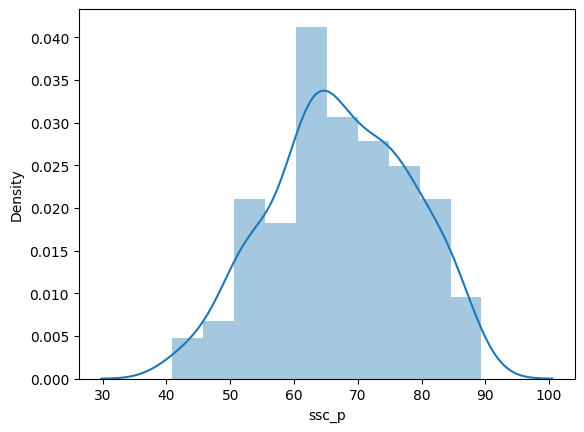

In [14]:
sns.distplot(dataset["ssc_p"])

In [ ]:
# to PDF for area 60 to 70 in ssc_p

In [27]:
def get_pdf_probability(dataset,startrange, endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde = True,kde_kws = {'color': 'blue'},color = 'green')
    pyplot.axvline(startrange , color = 'Red')
    pyplot.axvline(endrange , color = 'Red')

    # generate a sample
    sample = dataset

    # calculate parameters
    sample_mean = sample.mean()
    sample_std = sample.std()
    print('Mean = %3f, Standard Devistion = %.3f' % (sample_mean,sample_std))

    # define the distribution
    dist = norm(sample_mean,sample_std)

    #sample probability range of outcome
    values = [value for value in range(startrange,endrange)]
    probabilities = [dist.pdf(value) for value in values]
    prob = sum(probabilities)
    print("the area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

# function understand panu and practise and re write pani and explanation... to do,assignment,,

Mean = 67.303395, Standard Devistion = 10.827
the area between range(40,50):0.04489259448345172


0.04489259448345172

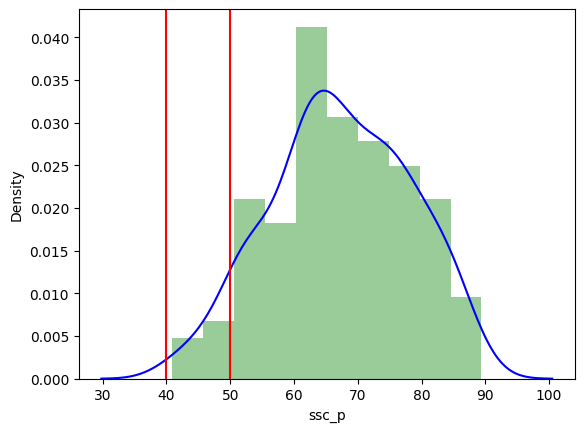

In [28]:
get_pdf_probability(dataset["ssc_p"],40, 50)
# interview question are there

In [37]:
# to calculate Cumulative calculation
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset["ssc_p"])
ecdf(80)

0.8651162790697674

In [ ]:
# for Standard NOr distribution from nor to std converstion

In [38]:
def stdBgrsph(dataset):
    import seaborn as sns
    mean = dataset.mean()
    std = dataset.std()

    values = [i for i in dataset]

    z_score = [((j-mean) / std) for j in values]

    sns.distplot(z_score , kde = True)

    sum(z_score) / len(z_score)


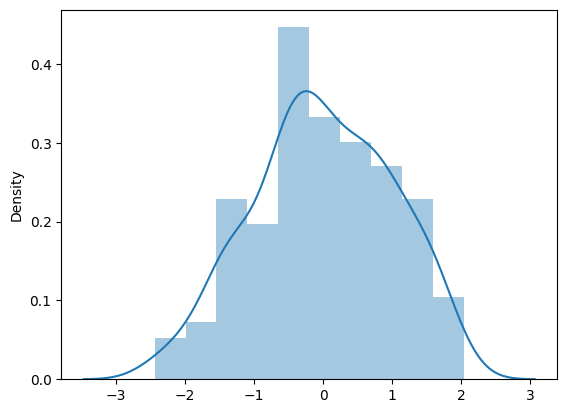

In [40]:
stdBgrsph(dataset["ssc_p"])